# Association Rules Assignment

# Problem Statement
 **Prepare rules for the  data set.**
##### 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
##### 2) Change the minimum length in apriori algorithm
##### 3) Visulize the obtained rules using different plots 

## Data set - groceries

## Objective:We want to create association rule for groceries

### Importing the important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

### Load the data set

In [4]:
groceries = pd.read_csv('groceries.csv',sep='\t',header=None)
groceries.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [5]:
groceries.columns=['items']
groceries

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [6]:
groceries=list(groceries["items"].apply(lambda x:x.split(',')))

In [8]:
te=TransactionEncoder()
te_data=te.fit(groceries).transform(groceries)
groceries1=pd.DataFrame(te_data,columns=te.columns_).astype(int)
groceries1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Understand the data set

In [9]:
groceries1.shape

(9835, 169)

In [10]:
groceries1.size

1662115

### Checking of null values in side the data set

In [11]:
groceries1.isnull().sum()

Instant food products    0
UHT-milk                 0
abrasive cleaner         0
artif. sweetener         0
baby cosmetics           0
                        ..
white bread              0
white wine               0
whole milk               0
yogurt                   0
zwieback                 0
Length: 169, dtype: int64

# Model Processing

### Model1

In [12]:
# Perform Association rule
groceries_itemsets = apriori(groceries1, min_support=0.05, use_colnames=True)
groceries_itemsets

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [13]:
rules1 = association_rules(groceries_itemsets, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


In [14]:
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


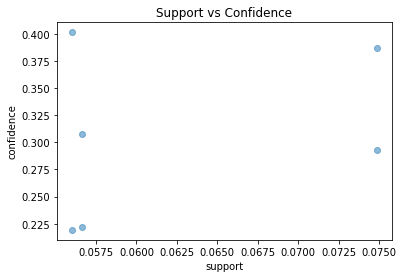

In [15]:
plt.scatter(rules1['support'], rules1['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

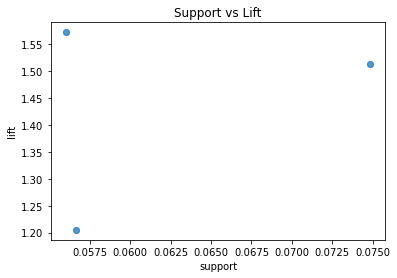

In [16]:
plt.scatter(rules1["support"], rules1["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

# Model2
## We will crate other rules by taking different length in Apriori

In [25]:
# Perform Association rule
groceries_itemsets2 = apriori(groceries1, min_support=0.03, use_colnames=True)
groceries_itemsets2

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(root vegetables, whole milk)"
59,0.040061,"(soda, whole milk)"
60,0.042298,"(whole milk, tropical fruit)"
61,0.032232,"(whole milk, whipped/sour cream)"


In [27]:
rules2 = association_rules(groceries_itemsets2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
1,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,0.006126,1.027703
2,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
3,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
4,(other vegetables),(rolls/buns),0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477
5,(rolls/buns),(other vegetables),0.183935,0.193493,0.042603,0.231620,1.197047,0.007013,1.049620
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
8,(soda),(other vegetables),0.174377,0.193493,0.032740,0.187755,0.970348,-0.001000,0.992936
9,(other vegetables),(soda),0.193493,0.174377,0.032740,0.169207,0.970348,-0.001000,0.993776


In [28]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
6,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
20,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
21,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
10,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
11,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
35,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
34,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
29,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
28,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


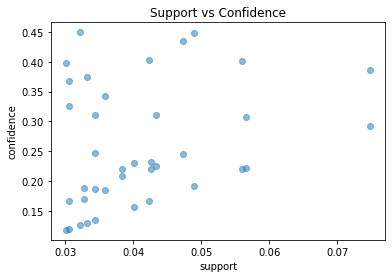

In [29]:
plt.scatter(rules2['support'], rules2['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

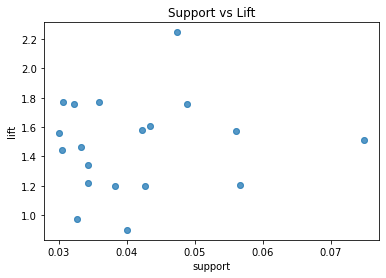

In [30]:
plt.scatter(rules2["support"], rules2["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()

# Model3
## We will crate other rules by taking different length in Apriori

In [36]:
# Perform Association rule
groceries_itemsets3 = apriori(groceries1, min_support=0.025, use_colnames=True)
groceries_itemsets3

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
83,0.027351,"(soda, yogurt)"
84,0.042298,"(whole milk, tropical fruit)"
85,0.029283,"(yogurt, tropical fruit)"
86,0.032232,"(whole milk, whipped/sour cream)"


In [37]:
rules3 = association_rules(groceries_itemsets3, metric="lift", min_threshold=0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(soda),0.110524,0.174377,0.028978,0.262190,1.503577,0.009705,1.119017
1,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,0.009705,1.066750
2,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
3,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,0.006126,1.027703
4,(whole milk),(brown bread),0.255516,0.064870,0.025216,0.098687,1.521293,0.008641,1.037519
...,...,...,...,...,...,...,...,...,...
63,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
64,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
65,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
66,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


In [38]:
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
24,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
33,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
32,(other vegetables),(whipped/sour cream),0.193493,0.071683,0.028876,0.149238,2.081924,0.015006,1.091160
62,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
...,...,...,...,...,...,...,...,...,...
59,(yogurt),(soda),0.139502,0.174377,0.027351,0.196064,1.124368,0.003025,1.026976
29,(other vegetables),(soda),0.193493,0.174377,0.032740,0.169207,0.970348,-0.001000,0.993776
28,(soda),(other vegetables),0.174377,0.193493,0.032740,0.187755,0.970348,-0.001000,0.992936
56,(soda),(whole milk),0.174377,0.255516,0.040061,0.229738,0.899112,-0.004495,0.966533


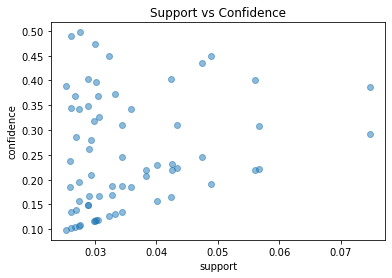

In [39]:
plt.scatter(rules3['support'], rules3['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

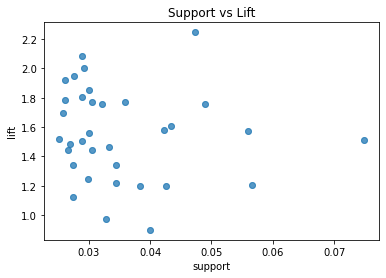

In [40]:
plt.scatter(rules3["support"], rules3["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()